In [4]:
import pandas as pd

# Importing the data

In [5]:
df = pd.read_csv(r"./New Updated CSV.csv")

In [6]:
df.shape

(1000, 14)

In [7]:
df.head()

,Sr No.,Company Name,Estab_year,Employees_count,Location,Designation,Involvement,Skills,HR_Name,Experience,linkedIN,Industry,LinkedIn Emp Count,LinkedIn Followers
0,1,Axis Bank,1994,More than 1000,"Bangalore, Mumbai",Relationship Manager (Drive),Full Time,"Corporate Sales,Debt Market,Equity Advisory,Mu...",Riddhi Thakkar,8-12 Years,https://www.linkedin.com/company/axis-bank/?tr...,Banking,78896,2294425
1,2,Axis Bank,1994,More than 1000,"Delhi, Kolkata",Relationship Manager (Drive),Full Time,"Corporate Sales,Debt Management,Debt Market,Eq...",Riddhi Thakkar,8-12 Years,https://www.linkedin.com/company/axis-bank/?tr...,Banking,78896,2294425
2,3,Carnera Technologies,2018,50 - 200,Work From Home,Inside Sales (Drive),Full Time,"Lead Generation,Sales",Roshni J,8-12 Years,https://www.linkedin.com/company/carnera,Information Technology & Services,44,743
3,4,Carnera Technologies,2018,50 - 200,Work From Home,Social Media (Drive),Full Time,"LinkedIn Sales Navigator,SEO,Social Media Mark...",Roshni J,8-12 Years,https://www.linkedin.com/company/carnera,Information Technology & Services,44,743
4,5,Concentrix,1983,More than 1000,"Bangalore, Gurgaon, Mumbai",Sr. Analyst (Drive),Full Time,"Adobe Launch,CSS,HTML,JavaScript",Deeksha Sharma,8-12 Years,https://www.linkedin.com/company/concentrix/,IT Services and IT Consulting,147404,1440949


# Removing Irrelevant Columns

In [8]:
df.drop(['Employees_count'], axis = 1, inplace = True)

# Renaming the columns

In [9]:
df.rename(columns = {'Sr No.':'Job_Id','Company Name':'Company_Name','Estab_year':'Estab_Year','LinkedIn Emp Count':'Employees_Count','LinkedIn Followers' : 'LinkedIn_Followers'}, inplace = True)

# Removing NULL values

In [10]:
df.isnull().sum()

Job_Id                0
Company_Name          0
Estab_Year            0
Location              0
Designation           0
Involvement           0
Skills                0
HR_Name               0
Experience            0
linkedIN              0
Industry              0
Employees_Count       0
LinkedIn_Followers    0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Job_Id                0
Company_Name          0
Estab_Year            0
Location              0
Designation           0
Involvement           0
Skills                0
HR_Name               0
Experience            0
linkedIN              0
Industry              0
Employees_Count       0
LinkedIn_Followers    0
dtype: int64

# Removing Noise Values 

In [13]:
df.dtypes

Job_Id                 int64
Company_Name          object
Estab_Year             int64
Location              object
Designation           object
Involvement           object
Skills                object
HR_Name               object
Experience            object
linkedIN              object
Industry              object
Employees_Count       object
LinkedIn_Followers    object
dtype: object

In [14]:
for col in ['Employees_Count','LinkedIn_Followers']:
    print(col,'\n', df[col].sort_values().unique(), '\n')

Employees_Count 
 ['1 employee' '10' '100' '101' '102' '1031' '1041' '1042' '1047' '105'
 '10524' '1064' '1067' '10672' '107' '1072' '10833' '109' '110' '111'
 '11109' '1116' '1118' '1124' '115' '1157' '1167' '117' '118' '12' '120'
 '121822' '122' '1237' '124' '125' '126' '127' '1276' '129' '13' '130'
 '13259' '133' '1331' '1347' '135' '1359' '1360' '1369' '137' '14' '143'
 '144' '1451' '1452' '14543' '1458' '146' '1463' '147' '147404' '14761'
 '149' '1493' '15' '151' '1511' '1517' '1529' '153' '1533' '156' '158'
 '15846' '16' '160' '161' '162' '163' '1636' '1647' '165' '1662' '168'
 '169' '1698' '17' '17061' '172' '1723' '174' '175' '178' '1786' '18'
 '180,543 followers' '1823' '1825' '183514' '184' '185' '186' '187' '1888'
 '189' '1894' '19' '190' '192' '1947' '1949' '19547' '19641' '197' '1992'
 '2' '20' '200' '20082' '201' '2021' '203' '207' '209' '20934' '21'
 '21429' '215' '216' '217' '218' '2189' '219' '22' '220' '2232' '2267'
 '227' '2286' '23' '230' '23079' '231' '232' '235' '

In [15]:
remove_noise = ['Not Available', 'Seattle, WA']

for col in ['Employees_Count','LinkedIn_Followers']:
    df = df[~(df[col].isin(remove_noise))]

In [16]:
replace_noise = [',','employee','followers'] 
for col in ['Employees_Count','LinkedIn_Followers']:
    for i in replace_noise:
        df[col] = df[col].str.replace(i,'')

In [17]:
for col in ['Employees_Count','LinkedIn_Followers']:
    print(col,'\n', df[col].sort_values().unique(), '\n')

Employees_Count 
 ['1 ' '10' '100' '101' '102' '1031' '1041' '1042' '1047' '105' '10524'
 '1064' '1067' '10672' '107' '1072' '10833' '109' '110' '111' '11109'
 '1116' '1118' '1124' '115' '1157' '1167' '117' '118' '12' '120' '121822'
 '122' '1237' '124' '125' '126' '127' '1276' '129' '13' '130' '13259'
 '133' '1331' '1347' '135' '1359' '1360' '1369' '137' '14' '143' '144'
 '1451' '1452' '14543' '1458' '146' '1463' '147' '147404' '14761' '149'
 '1493' '15' '151' '1511' '1517' '1529' '153' '1533' '156' '158' '15846'
 '16' '160' '161' '162' '163' '1636' '1647' '165' '1662' '168' '169'
 '1698' '17' '17061' '172' '1723' '174' '175' '178' '1786' '18' '1823'
 '1825' '183514' '184' '185' '186' '187' '1888' '189' '1894' '19' '190'
 '192' '1947' '1949' '19547' '19641' '197' '1992' '2' '20' '200' '20082'
 '201' '2021' '203' '207' '209' '20934' '21' '21429' '215' '216' '217'
 '218' '2189' '219' '22' '220' '2232' '2267' '227' '2286' '23' '230'
 '23079' '231' '232' '235' '238' '239' '24' '240' '2425'

In [18]:
df['Location'] = df['Location'].str.split(',').str[0]

# Checking datatypes

In [19]:
for col in ['Employees_Count','LinkedIn_Followers']:
        df[col] = df[col].astype(int)    

In [20]:
df.dtypes

Job_Id                 int64
Company_Name          object
Estab_Year             int64
Location              object
Designation           object
Involvement           object
Skills                object
HR_Name               object
Experience            object
linkedIN              object
Industry              object
Employees_Count        int32
LinkedIn_Followers     int32
dtype: object

In [21]:
df.shape

(884, 13)

# Unique Values in Categorical Columns

In [22]:
num = []
cat = []
for col in df:
    if df[col].dtype == 'O':
        cat.append(col)
    else:
        num.append(col)

In [23]:
df[num].head()

,Job_Id,Estab_Year,Employees_Count,LinkedIn_Followers
0,1,1994,78896,2294425
1,2,1994,78896,2294425
2,3,2018,44,743
3,4,2018,44,743
4,5,1983,147404,1440949


In [24]:
df[cat].head()

,Company_Name,Location,Designation,Involvement,Skills,HR_Name,Experience,linkedIN,Industry
0,Axis Bank,Bangalore,Relationship Manager (Drive),Full Time,"Corporate Sales,Debt Market,Equity Advisory,Mu...",Riddhi Thakkar,8-12 Years,https://www.linkedin.com/company/axis-bank/?tr...,Banking
1,Axis Bank,Delhi,Relationship Manager (Drive),Full Time,"Corporate Sales,Debt Management,Debt Market,Eq...",Riddhi Thakkar,8-12 Years,https://www.linkedin.com/company/axis-bank/?tr...,Banking
2,Carnera Technologies,Work From Home,Inside Sales (Drive),Full Time,"Lead Generation,Sales",Roshni J,8-12 Years,https://www.linkedin.com/company/carnera,Information Technology & Services
3,Carnera Technologies,Work From Home,Social Media (Drive),Full Time,"LinkedIn Sales Navigator,SEO,Social Media Mark...",Roshni J,8-12 Years,https://www.linkedin.com/company/carnera,Information Technology & Services
4,Concentrix,Bangalore,Sr. Analyst (Drive),Full Time,"Adobe Launch,CSS,HTML,JavaScript",Deeksha Sharma,8-12 Years,https://www.linkedin.com/company/concentrix/,IT Services and IT Consulting


In [25]:
for col in cat:
    print(col, '--', df[col].nunique(), '\n', df[col].unique(), '\n')

Company_Name -- 484 
 ['Axis Bank' 'Carnera Technologies' 'Concentrix' 'epiFi' 'NxtWave'
 'Powerplay' 'Amazon Devices' 'CarDekho' 'Digit88 Technologies' 'Jupiter'
 'mPokket' 'Bombay Shaving Company' 'CreditVidya' 'Fintellix Solutions'
 'GoKiwi' 'HealthAsyst' 'Miles Education' 'Office Banao' 'Unocoin'
 'Automovill' 'Cequence Security' 'Clario' 'Nab' 'Quick Visa Solutions'
 'Bajaj Finserv' 'Einfochips' 'Galaxy Office Automation' 'HomeCapital'
 'NeuralGarage' 'QuickSell' 'Acko' 'CASHe' 'Clari' 'D-Techworks'
 'Data Sutram' 'GoodBarber' 'ModMed' 'Paytm Money' 'VMC Technologies'
 'Apollo.io' 'Axi' 'Delhivery' 'Fountainhead International B.V.'
 'Havells India' 'Netradyne' 'upGrad' 'World Compliance Technologies'
 'Akribiz Business Solutions' 'Asentech' 'Minutus Computing' 'RSPL'
 'Tower Research Capital' 'Univariety' 'Ziroh Labs'
 'Deutsche Telekom Digital Labs' 'Live Your Best Life' 'NiYO Solutions'
 'Persistent Systems' 'Preqin' 'Pure Storage' 'QuEST Global' 'Toddle'
 'BetterPlace' 'Blinkit

# Experience_Level

In [26]:
df['Experience'] = df['Experience'].str.replace(' Years', '')

In [27]:
df['Experience'].unique()

array(['8-12', '1-4', '6-10', '5-10', '3-8', '9-12', '2-4', '10-15',
       '4-8', '1-5', '5-9', '6-11', '3-7', '1-6', '9-11', '7-12', '8-13',
       '4-6', '2-6', '5-8', '6-8', '9-14', '4-9', '3-5', '10-13', '1-3',
       '2-7', '3-6', '5-7', '10-14', '1-2', '0', '2-5', '4-7', '2-3',
       '0-5', '7-10', '4-5', '9-13', '7-11', '8-11', '15-20', '5-6',
       '0-2', '12-15', '11-16', '0-1', '6-9', '0-3', '0-4', '3-4',
       '15-18', '0-0', '12-16', '8-10', '13-18', '2-2', '7-9', '12-13',
       '14-19', '12-17', '6-6', '10-12', '12-12', '7-8', '8-9'],
      dtype=object)

In [28]:
import re

In [29]:
def avg(x):
    l = [int(i) for i in re.findall(r'(\d+)',x)]
    return sum(l)/len(l)

In [30]:
df['Experience'].apply(lambda x: avg(x))

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
995    10.5
996     7.5
997     8.5
998     6.5
999     7.0
Name: Experience, Length: 884, dtype: float64

In [31]:
def level(x):
    x = avg(x)
    if x <= 2:
        return 'Fresher'
    elif x <= 4:
        return 'Junior Level'
    elif x <= 8:
        return 'Intermediate Level'
    elif x <= 12:
        return 'Mid-Senior Level'
    elif x <= 15:
        return 'Senior Executive'
    else:
        return 'Veteran'

In [32]:
df['Experience_Level'] = df['Experience'].apply(lambda x: level(x))

In [33]:
df['Experience_Level'].value_counts()

Intermediate Level    389
Mid-Senior Level      182
Junior Level          169
Fresher               103
Senior Executive       30
Veteran                11
Name: Experience_Level, dtype: int64

# Outlier Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

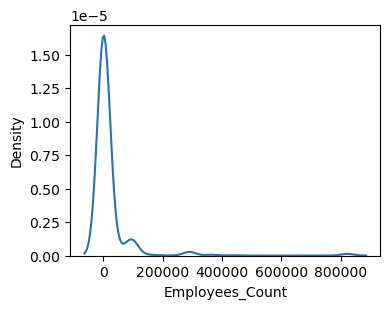

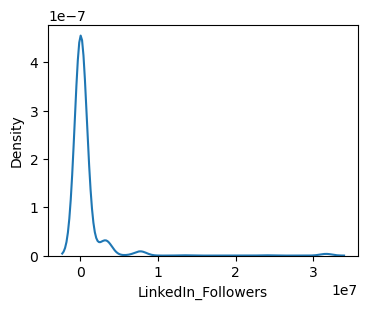

In [35]:
for col in ['Employees_Count', 'LinkedIn_Followers']:
        plt.figure(figsize = (4,3))
        sns.kdeplot(df[col])
        plt.show()

In [36]:
for col in ['Employees_Count', 'LinkedIn_Followers']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    outliers = df[(df[col] <= ll) | (df[col] >= ul)]

In [37]:
outliers

,Job_Id,Company_Name,Estab_Year,Location,Designation,Involvement,Skills,HR_Name,Experience,linkedIN,Industry,Employees_Count,LinkedIn_Followers,Experience_Level
0,1,Axis Bank,1994,Bangalore,Relationship Manager (Drive),Full Time,"Corporate Sales,Debt Market,Equity Advisory,Mu...",Riddhi Thakkar,8-12,https://www.linkedin.com/company/axis-bank/?tr...,Banking,78896,2294425,Mid-Senior Level
1,2,Axis Bank,1994,Delhi,Relationship Manager (Drive),Full Time,"Corporate Sales,Debt Management,Debt Market,Eq...",Riddhi Thakkar,8-12,https://www.linkedin.com/company/axis-bank/?tr...,Banking,78896,2294425,Mid-Senior Level
4,5,Concentrix,1983,Bangalore,Sr. Analyst (Drive),Full Time,"Adobe Launch,CSS,HTML,JavaScript",Deeksha Sharma,8-12,https://www.linkedin.com/company/concentrix/,IT Services and IT Consulting,147404,1440949,Mid-Senior Level
10,11,Amazon Devices,1994,Hyderabad,Content Writer (Drive),Full Time,"Content Writing,English Content",Maria Joseph,1-4,https://www.linkedin.com/company/amazon/about/,Software Development,822544,31648397,Junior Level
11,12,Amazon Devices,1994,Chennai,Content Writer (Drive),Full Time,"Content Writing,English Content",Maria Joseph,1-4,https://www.linkedin.com/company/amazon/about/,Software Development,822544,31648399,Junior Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,LTIMindtree,1996,Bangalore,Data Science Professional,Full Time,"Python,NLP,Shell Scripting,Machine Learning,Al...",Bhaskar Anand,8-13,https://www.linkedin.com/company/ltimindtree/a...,IT Services and IT Consulting,96704,3311434,Mid-Senior Level
996,997,LTIMindtree,1996,Chennai,Data Science Professional,Full Time,"OpenCV,Python,NLP,Machine Learning",Bhaskar Anand,6-9,https://www.linkedin.com/company/ltimindtree/a...,IT Services and IT Consulting,96704,3311434,Intermediate Level
997,998,LTIMindtree,1996,Hyderabad,Data Science Professional,Full Time,"NLP,Python,Shell Scripting,Machine Learning,Al...",Bhaskar Anand,7-10,https://www.linkedin.com/company/ltimindtree/a...,IT Services and IT Consulting,96704,3311434,Mid-Senior Level
998,999,LTIMindtree,1996,Kolkata,Data Science Professional,Full Time,"Machine Learning,Algorithms,Python,Unix,Shell ...",Bhaskar Anand,5-8,https://www.linkedin.com/company/ltimindtree/a...,IT Services and IT Consulting,96704,3311434,Intermediate Level


In [38]:
outliers.shape

(153, 14)

In [39]:
df = df[~((df[col] <= ll) | (df[col] >= ul))]

In [40]:
df.shape

(731, 14)

# Model Building

# Company_Class

### Based on  Employee count and LinkedIn followers, categorize the company into Class1, Class2, Class3, and Class4  (Try using a clustering algorithm for it). Add a column to the Company table as Class and populate it with Class1, Class2, Class3, and Class4

In [41]:
df.columns

Index(['Job_Id', 'Company_Name', 'Estab_Year', 'Location', 'Designation',
       'Involvement', 'Skills', 'HR_Name', 'Experience', 'linkedIN',
       'Industry', 'Employees_Count', 'LinkedIn_Followers',
       'Experience_Level'],
      dtype='object')

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
# Standardize the features
sc = StandardScaler()
df[['Employees_Count_sc', 'LinkedIn_Followers_sc']] = sc.fit_transform(df[['Employees_Count', 'LinkedIn_Followers']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=13)
df['Company_Class'] = kmeans.fit_predict(df[['Employees_Count_sc', 'LinkedIn_Followers_sc']]) + 1  # Add 1 to start classes from 1

# Map cluster labels to class names
df['Company_Class'] = df['Company_Class'].map({1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4'})

df


,Job_Id,Company_Name,Estab_Year,Location,Designation,Involvement,Skills,HR_Name,Experience,linkedIN,Industry,Employees_Count,LinkedIn_Followers,Experience_Level,Employees_Count_sc,LinkedIn_Followers_sc,Company_Class
2,3,Carnera Technologies,2018,Work From Home,Inside Sales (Drive),Full Time,"Lead Generation,Sales",Roshni J,8-12,https://www.linkedin.com/company/carnera,Information Technology & Services,44,743,Mid-Senior Level,-0.385905,-0.743418,Class 3
3,4,Carnera Technologies,2018,Work From Home,Social Media (Drive),Full Time,"LinkedIn Sales Navigator,SEO,Social Media Mark...",Roshni J,8-12,https://www.linkedin.com/company/carnera,Information Technology & Services,44,743,Mid-Senior Level,-0.385905,-0.743418,Class 3
5,6,epiFi,2019,Bangalore,Relationship Manager (Drive),Full Time,"Corporate Sales,Lead Generation,Sales",Janaki B,8-12,https://www.linkedin.com/company/epifi/about/,Financial Services,875,47111,Mid-Senior Level,-0.034663,0.134780,Class 1
6,7,NxtWave,2020,Hyderabad,Corporate Relations Manager (Drive),Full Time,"Corporate Sales,Customer Relationship",Arifulla Gori Mohammad,8-12,https://www.linkedin.com/company/nxtwavetech/a...,Education Administration Programs,4986,144468,Mid-Senior Level,1.702946,1.978697,Class 2
7,8,NxtWave,2020,Hyderabad,Head of Sourcing (Drive),Full Time,"Campus Recruitment,IT Recruitment,Non IT Recru...",Arifulla Gori Mohammad,8-12,https://www.linkedin.com/company/nxtwavetech/a...,Education Administration Programs,4986,144468,Mid-Senior Level,1.702946,1.978697,Class 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,ZopSmart Technology,2016,Bangalore,Technical Scrum Master,Full Time,"Agile,Scrum",Padmavathi S,0-2,https://www.linkedin.com/company/zopsmart/about/,Software Development,439,9212,Fresher,-0.218949,-0.583017,Class 3
990,991,Agivant Technologies,2023,Pune,Full Stack .NET Developer,Full Time,"SQL Server,ASP.NET,JavaScript,Azure",Shivkumar Gurram,4-9,https://www.linkedin.com/company/agivant-tech/...,IT Services and IT Consulting,18,847,Intermediate Level,-0.396894,-0.741448,Class 3
991,992,CS Soft Solutions,2009,Work From Home,AWS Data Engineer / Architect,Full Time,"AWS,PySpark,SQL,Amazon Redshift,Airflow",Opportunity Rm,7-10,https://www.linkedin.com/company/cssoft-soluti...,IT Services and IT Consulting,475,11524,Mid-Senior Level,-0.203733,-0.539228,Class 3
992,993,CS Soft Solutions,2009,Work From Home,Lead Data Engineer,Full Time,"AWS,Python,AWS Lambda,Git,Jira",Opportunity Rm,8-9,https://www.linkedin.com/company/cssoft-soluti...,IT Services and IT Consulting,475,11524,Mid-Senior Level,-0.203733,-0.539228,Class 3


In [44]:
skills = [i.strip() for i in list(set(','.join(df['Skills']).split(',')))]

In [45]:
skills

['SQL Server',
 'J2EE',
 'Physics',
 'ServiceNow',
 'Linux Internals',
 'JMeter',
 'Blockchain',
 'Microservices',
 'Palo Alto',
 'Travel Planning',
 'Google Cloud',
 'CSM',
 'OpenStack',
 'CakePHP',
 'LinkedIn Sales Navigator',
 'Clevertap',
 'IT Infrastructure',
 'jQuery',
 'SDET',
 'Travel Management',
 'Next.js',
 'Visual Design',
 'DevOps',
 'BigQuery',
 'Hybrid Apps',
 'Multithreading',
 'Resource Management',
 'Marketing',
 'PPC',
 'Hadoop',
 'Hibernate',
 'Inbound Marketing',
 'EMR',
 'UART',
 'GTS',
 'Tourism',
 'Progressive Web Apps',
 'FPA',
 'Ember.js',
 'PERT',
 'Shell Scripting',
 'Order Fulfillment',
 'COM',
 'React Native',
 'Adobe After Effects',
 'Program Management',
 'Spring',
 'COE',
 'Vendor Management',
 'Firewalls',
 'Zoho CRM',
 'Stock Broking',
 'Automobile Engineering',
 'Ethereum',
 'Category Management',
 'Email Marketing',
 'SEM',
 'Facebook Marketing',
 'Data Streaming',
 '3D Modelling',
 'Regression Testing',
 'Employee Engagement',
 'Golang',
 'Reliabil

In [46]:
len(skills)

517

In [47]:
df['Skills'].str.lower().str.split(',')

2                               [lead generation, sales]
3      [linkedin sales navigator, seo, social media m...
5              [corporate sales, lead generation, sales]
6               [corporate sales, customer relationship]
7      [campus recruitment, it recruitment, non it re...
                             ...                        
989                                       [agile, scrum]
990             [sql server, asp.net, javascript, azure]
991        [aws, pyspark, sql, amazon redshift, airflow]
992                 [aws, python, aws lambda, git, jira]
993                            [salesforce, visualforce]
Name: Skills, Length: 731, dtype: object

# DataFrame Function

In [48]:
df.reset_index(drop = True, inplace = True)

In [49]:
def data_frame(x):
#   x = ' pyThon , abc, jaVa , SQL, xyz'  

    x = [i.strip() for i in x.lower().split(',')]   
#   x = ['python', 'abc', 'java', 'sql', 'xyz']

    y = df['Skills'].str.lower().str.split(',')

    indices = []
    missing_skills = []

    for skill in x:
        skill_found = False
        for j in range(len(y)):
            if skill in y[j]:
                indices.append(j)
                skill_found = True
        if not skill_found:
            missing_skills.append(skill)

    if missing_skills:
        missing_skill_msg = ', '.join(missing_skills)
        missing_msg = f'There is no job for {missing_skill_msg}.'
        if len(indices) < 1:
            return missing_msg
        else:
            print(missing_msg)  # Print the missing skill message


    indices = sorted(list(set(indices)))

    final_df = df[df.index.isin(indices)]
    if len(final_df) < 1:
        return 'There are no jobs for these skills'
    else:
        return final_df

In [50]:
x  = ' pyThon , abc, jaVa , SQL, xyz'
data_frame(x)

There is no job for abc, xyz.


,Job_Id,Company_Name,Estab_Year,Location,Designation,Involvement,Skills,HR_Name,Experience,linkedIN,Industry,Employees_Count,LinkedIn_Followers,Experience_Level,Employees_Count_sc,LinkedIn_Followers_sc,Company_Class
16,23,Digit88 Technologies,2014,Pune,Java Developer SD3,Full Time,"Java,Spring Boot,Microservices,Data Structures...",Manju Kumari,6-10,https://www.linkedin.com/company/digit88-techn...,IT Services and IT Consulting,64,2516,Intermediate Level,-0.377451,-0.709838,Class 3
19,26,HealthAsyst,1999,Bangalore,.NET Architect,Full Time,".NET,SQL",Sakshi Sahu,10-15,https://www.linkedin.com/company/healthasyst,Software Development,345,25404,Senior Executive,-0.258680,-0.276345,Class 3
24,32,Cequence Security,2014,Work From Home,Site Reliability Engineer Or SRE,Full Time,"Python,CI - CD,Kafka,Ansible,Terraform",Sougat Das,5-9,https://www.linkedin.com/company/cequence-secu...,Computer and Network Security,172,14657,Intermediate Level,-0.331803,-0.479890,Class 3
25,33,Clario,1990,Bangalore,Fullstack Developer,Full Time,"Java,Spring,Data Structures,Algorithms,JavaScript",Arpita Dey,5-10,https://www.linkedin.com/company/bioclinica/ab...,Pharmaceutical Manufacturing,1992,92146,Intermediate Level,0.437463,0.987732,Class 1
26,34,Digit88 Technologies,2014,Pune,Principle Java Engineer,Full Time,"Java,Spring Boot,Microservices,AWS,MySQL",Deepika Kangokar,10-15,https://www.linkedin.com/company/digit88-techn...,IT Services and IT Consulting,64,2516,Senior Executive,-0.377451,-0.709838,Class 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,976,ResMed,1989,Bangalore,Engineering Manager - Java,Full Time,"AWS,Algorithms,Angular,Azure,CI - CD,CSS,Data ...",Pramith Kumar,10-14,https://www.linkedin.com/company/resmed/about/,Medical Equipment Manufacturing,6951,154627,Mid-Senior Level,2.533499,2.171106,Class 2
719,979,Thrillophilia,2010,Delhi,Senior Software Developer,Full Time,"Golang,Python,Ruby,Ruby on Rails",Sushmita Nayak,4-6,https://www.linkedin.com/company/thrillophilia...,Internet Publishing,672,65740,Intermediate Level,-0.120466,0.487609,Class 1
724,988,MyBillBook (FloBiz),2019,Bangalore,Data Scientist,Full Time,"Computer Vision,Keras,Machine Learning,NLP,PyT...",Hr,2-4,https://www.linkedin.com/company/flobiz/,IT Services and IT Consulting,409,18605,Junior Level,-0.231629,-0.405116,Class 3
728,992,CS Soft Solutions,2009,Work From Home,AWS Data Engineer / Architect,Full Time,"AWS,PySpark,SQL,Amazon Redshift,Airflow",Opportunity Rm,7-10,https://www.linkedin.com/company/cssoft-soluti...,IT Services and IT Consulting,475,11524,Mid-Senior Level,-0.203733,-0.539228,Class 3


# Final Output Function

In [51]:
df.columns

Index(['Job_Id', 'Company_Name', 'Estab_Year', 'Location', 'Designation',
       'Involvement', 'Skills', 'HR_Name', 'Experience', 'linkedIN',
       'Industry', 'Employees_Count', 'LinkedIn_Followers', 'Experience_Level',
       'Employees_Count_sc', 'LinkedIn_Followers_sc', 'Company_Class'],
      dtype='object')

In [52]:
def final_output(x):
    final_df = data_frame(x)
    exp_level = final_df['Experience_Level'].mode()[0]
    industry = final_df['Industry'].mode()[0]
    company_class = final_df['Company_Class'].mode()[0]
    job_count = final_df['Job_Id'].count()
    return(exp_level,industry,company_class,job_count)

In [53]:
x  = ' pyThon , abc, jaVa , SQL, xyz'
final_output(x)

There is no job for abc, xyz.


('Intermediate Level', 'Software Development', 'Class 3', 229)

In [54]:
import matplotlib.pyplot as plt

c:\Users\AMARJEET\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


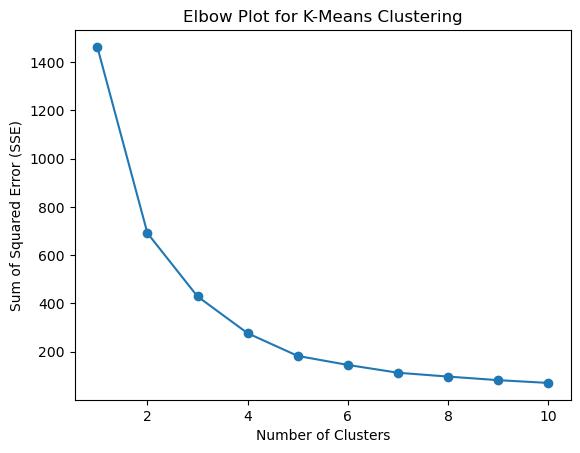

In [55]:
# Calculate Sum of Squared Error (SSE) for each cluster number
sse_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=13)
    kmeans.fit(df[['Employees_Count_sc', 'LinkedIn_Followers_sc']])
    sse_values.append(kmeans.inertia_)  # SSE is also stored in 'inertia_'

# Plot the elbow plot
plt.plot(range(1, 11), sse_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Plot for K-Means Clustering')
plt.show()


In [56]:
kmeans.inertia_

70.8812641121493

c:\Users\AMARJEET\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


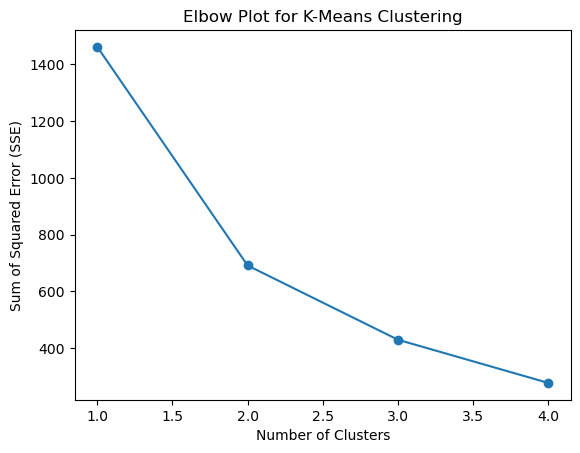

In [57]:
# Calculate Sum of Squared Error (SSE) for each cluster number
sse_values = []
for num_clusters in range(1, 5):
    kmeans = KMeans(n_clusters=num_clusters, random_state=13)
    kmeans.fit(df[['Employees_Count_sc', 'LinkedIn_Followers_sc']])
    sse_values.append(kmeans.inertia_)  # SSE is also stored in 'inertia_'

# Plot the elbow plot
plt.plot(range(1, 5), sse_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Plot for K-Means Clustering')
plt.show()


In [58]:
kmeans.inertia_

276.5874237673986

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

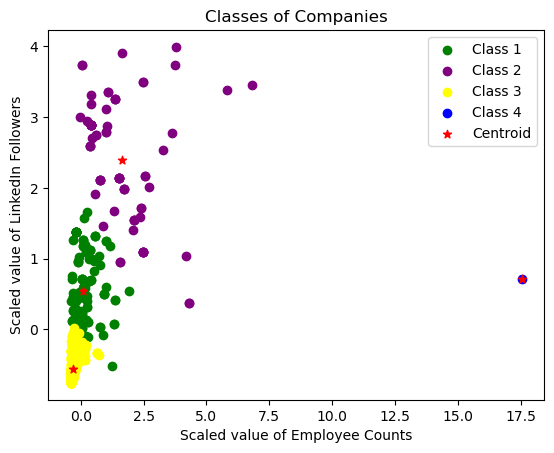

In [60]:
# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=13)
kmeans.fit(df[['Employees_Count_sc', 'LinkedIn_Followers_sc']])

# plotting clusters with their centroids
df1 = df[df['Company_Class']=='Class 1']
df2 = df[df['Company_Class']=='Class 2']
df3 = df[df['Company_Class']=='Class 3']
df4 = df[df['Company_Class']=='Class 4']

plt.scatter(df1['Employees_Count_sc'], df1['LinkedIn_Followers_sc'],color='green',label='Class 1')
plt.scatter(df2['Employees_Count_sc'], df2['LinkedIn_Followers_sc'],color='purple',label='Class 2')
plt.scatter(df3['Employees_Count_sc'], df3['LinkedIn_Followers_sc'],color='yellow',label='Class 3')
plt.scatter(df4['Employees_Count_sc'], df4['LinkedIn_Followers_sc'],color='blue',label='Class 4')

plt.xlabel("Scaled value of Employee Counts")
plt.ylabel('Scaled value of LinkedIn Followers')
plt.title('Classes of Companies')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='Centroid')
plt.legend()

In [61]:
df.to_csv("Processed_file.csv")

In [62]:
all_skills = [i for i in ','.join(df['Skills']).split(',')]

In [63]:
skill_df = pd.DataFrame({'Skills':all_skills})

In [64]:
skill_df.value_counts()

Skills           
Java                 121
Python               115
AWS                   88
JavaScript            87
Sales                 76
                    ... 
Ionic                  1
IoT                    1
International BPO      1
Internal Audit         1
three.js               1
Length: 517, dtype: int64